# Classification Walk-through

links: 
- https://drivendata.github.io/cookiecutter-data-science/
- https://towardsdatascience.com/machine-learning-with-the-titanic-dataset-7f6909e58280

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# sklearn
from sklearn import (ensemble, preprocessing, tree)
from sklearn.metrics import (auc, confusion_matrix, roc_auc_score, roc_curve)
from sklearn.model_selection import (train_test_split, StratifiedKFold)

# Yellowbrick a visualization library for evaluating models
from yellowbrick.classifier import (ConfusionMatrix, ROCAUC)
from yellowbrick.model_selection import (LearningCurve)

In [2]:
# import sys
# sys.path

 /Users/ryantalbot/opt/anaconda3/envs/tf2/bin/python -m pip install pandas-profiling

## 1. import the dataset
    - 1.a. Initial preparataion: renmae columns, change values inside columns to be consistent

## 2. Split the data
    - 2.a. split into train, test, and validation
  
## 3. Initial Data Analysis
    - 3.a. feature importance , id which features are important to data
    
## 4. Transform categorical variables

## 5. Train Model? 

## Import Data

In [3]:
train = pd.read_csv('./train.csv')

In [4]:
test = pd.read_csv('./test.csv')

In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
submission = pd.read_csv('gender_submission.csv')

In [8]:
def concat_df(train, test):
    return pd.concat([train, test], sort=True).reset_index(drop=True)

In [9]:
df_all = concat_df(train, test)
dfs = [train, test]

In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [12]:
print('median for age separated by Pclass:')
display(train.groupby('Pclass')['Age'].median())

median for age separated by Pclass:


Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

Leaky features - are variables that contain information about the feature or target. 

In [13]:
train.describe().iloc[:, :2]

,PassengerId,Survived
count,891.000000,891.000000
mean,446.000000,0.383838
std,257.353842,0.486592
min,1.000000,0.000000
25%,223.500000,0.000000
50%,446.000000,0.000000
75%,668.500000,1.000000
max,891.000000,1.000000


In [14]:
train['Embarked'].replace('Q', 0,inplace=True)
train['Embarked'].replace('S', 1,inplace=True)
train['Embarked'].replace('C', 2,inplace=True)

test['Embarked'].replace('Q', 0,inplace=True)
test['Embarked'].replace('S', 1,inplace=True)
test['Embarked'].replace('C', 2,inplace=True)

train['Sex'].replace('male', 0,inplace=True)
train['Sex'].replace('female', 1,inplace=True)

test['Sex'].replace('male', 0,inplace=True)
test['Sex'].replace('female', 1,inplace=True)



In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0


In [16]:
print('median for age separated by Pclass and sex:')
display(train.groupby(['Pclass', 'Sex'])['Age'].median())

median for age separated by Pclass and sex:


Pclass  Sex
1       0      40.0
        1      35.0
2       0      30.0
        1      28.0
3       0      25.0
        1      21.5
Name: Age, dtype: float64

In [17]:
print('Number of cases:')
display(train.groupby(['Pclass', 'Sex'])['Age'].count())

Number of cases:


Pclass  Sex
1       0      101
        1       85
2       0       99
        1       74
3       0      253
        1      102
Name: Age, dtype: int64

In [18]:
df_all['Age'] = df_all.groupby(
    ['Pclass', 'Sex'])['Age'].apply(
    lambda x: x.fillna(x.median()))



In [19]:
women = train.loc[train.Sex == 1]["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [20]:
fares = train.loc[train.Fare > 100]["Survived"]
rate_fares = sum(fares)/len(fares)

print("% of fares over $100 who survived:", rate_fares)



% of fares over $100 who survived: 0.7358490566037735


In [21]:
df_all.loc[df_all['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [22]:
# mr_thomas = df_all.loc[(
#     df_all['Pclass'] == 3) & (
#     df_all['SibSp'] == 0) & (
#     df_all['Embarked'] == 'S')]['Fare'].median()

thomas=7.925

print(thomas)
df_all.loc[df_all['Fare'].isnull(), 'Fare'] = thomas

7.925


In [23]:
df_all['deck'] = df_all[
    'Cabin'].apply(
    lambda s: s[0] if pd.notnull(s) else 'M')

<AxesSubplot:xlabel='deck'>

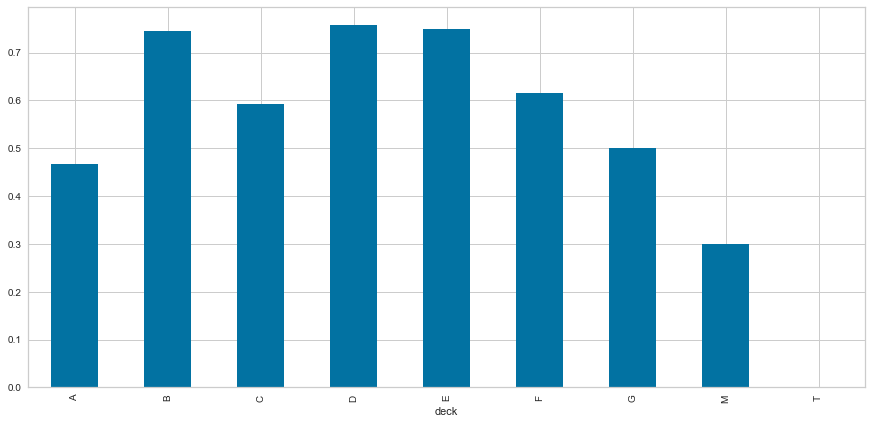

In [24]:
df_all[['deck', 'Survived']].groupby(
    'deck')['Survived'].mean().plot(kind='bar', figsize=(15,7))
# plot.subtitle('Survival rates for different cabines')

In [25]:
idx = df_all[df_all['deck'] == 'T'].index
df_all.loc[idx, 'deck'] = 'A'
df_all['deck'] = df_all['deck'].replace(['A', 'B', 'C'], 'ABC')
df_all['deck'] = df_all['deck'].replace(['D', 'E'], 'DE')
df_all['deck'] = df_all['deck'].replace(['F', 'G'], 'FG')

df_all['deck'].value_counts()

M      1014
ABC     182
DE       87
FG       26
Name: deck, dtype: int64

In [26]:
df_all.loc[df_all['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,deck
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,ABC
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,ABC


In [27]:
df_all.loc[(df_all['Pclass'] == 1) & (
    df_all['Fare'] <= 80) & (
    df_all['deck'] == 'ABC')]['Embarked'].value_counts()

S    50
C    42
Name: Embarked, dtype: int64

In [28]:
df_all.loc[df_all['Embarked'].isnull(), 'Embarked'] = 'S'

# left off at 2.5 conclusion

In [29]:
print('missing in the data:')
display(df_all.isnull().sum())

missing in the data:


Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
deck              0
dtype: int64

In [30]:
print('missing in the data:')
display(train.isnull().sum())

missing in the data:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
print('missing in the data:')
display(test.isnull().sum())

missing in the data:


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64